# Workbook Information

https://www.kaggle.com/competitions/nlp-getting-started/overview

In [1]:
# Importing the helper_functions file
import os

if not os.path.exists('helper_functions.py'):
  !wget https://raw.githubusercontent.com/DavAll22/Extra-Code/main/helper_functions_TF.py
else:
  print("[INFO] 'helper_functions_TF.py' already exists, skipping download.")

--2023-06-08 11:45:06--  https://raw.githubusercontent.com/DavAll22/Extra-Code/main/helper_functions_TF.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13751 (13K) [text/plain]
Saving to: ‘helper_functions_TF.py’

helper_functions_TF 100%[===================>]  13.43K  --.-KB/s    in 0s      

2023-06-08 11:45:06 (55.4 MB/s) - ‘helper_functions_TF.py’ saved [13751/13751]



# Importing the dataset

In [2]:
!pip install opendatasets
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
od.download("https://www.kaggle.com/competitions/nlp-getting-started/overview")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: davall22
Your Kaggle Key: ··········


100%|██████████| 593k/593k [00:00<00:00, 103MB/s]


Extracting archive ./nlp-getting-started/nlp-getting-started.zip to ./nlp-getting-started


Download from kaggle using username API key from kaggle.json. THe download requires the challenge to be accepted, then downloads all relevent files into /nlp-getting-started.
The files can also be manually downloaded and copied over from the competition webpage.

# Making & Exploring the dataset

In [7]:
train_df = pd.read_csv('/content/nlp-getting-started/train.csv')
test_df = pd.read_csv('/content/nlp-getting-started/test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
# Shuffling the data
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
# How many samples in the dataset
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

Binary classification (target column has 1 or 0)

In [10]:
# How many samples total and in each set:
print(f'Total training samples: {len(train_df)}')
print(f'Total test samples: {len(test_df)}')
print(f'Total samples: {len(train_df) + len(test_df)}')

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [11]:
# Visualising random samples
import random
random_index = random.randint(0, len(train_df)-5) # creating random indexes not higher than the total number of samples
for row in train_df_shuffled[['text', 'target']][random_index:random_index+5].itertuples(): # turn text and target into a tuple
  _, text, target = row
  print(f'Target: {target}', '(real disaster)' if target > 0 else '(not real disaster)')
  print(f'Text:\n{text}\n')
  print('---\n')

Target: 0 (not real disaster)
Text:
11 puncture wounds

---

Target: 0 (not real disaster)
Text:
I liked a @YouTube video from @skippy6gaming http://t.co/MXhrextrkh Minecraft PS4 - 3 X 2 LAVA DOOR - How To - Tutorial ( PS3 / XBOX

---

Target: 0 (not real disaster)
Text:
You Bitches Walking Around Like Yall Hot Shit &amp; Got Bed Bugs &amp; You Burning ????

---

Target: 0 (not real disaster)
Text:
Brace yourself @samaritans by Sunday evening you will inundated with thousands of calls from depressed @Arsenal fans http://t.co/HexPc77otN

---

Target: 0 (not real disaster)
Text:
https://t.co/oIfN28HpCS @ArianaGrande @ScreamQueens 
Katherine's death

---



## Splitting data into datasets

In [12]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size=0.1, # 10% of training dataset becomes validation dataset
                                                                            random_state=42)

len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [13]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

# Text Vectorization & Embedding

## Text Vectorization

In [14]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Finding average number of tokens (words) in the training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

Have an average of 15 words in each Tweet

In [15]:
max_vocab_length = 10000 # max number of words to have in the vocabulary
max_length = 15 # max length the sequences will be

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [16]:
# Sample sentence to test tokenization
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [17]:
# Choosing a random sentence from the training set and tokenizing it
random_sentence = random.choice(train_sentences)
print(f'Original text:\n{random_sentence}\
      \n\nVectorized version:')
text_vectorizer([random_sentence])

Original text:
@Robot_Rainstorm I'm a huge football fan as you know but I've never done fantasy leagues. Patience for a newbie?      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[3459,   32,    3,  775, 1523,  627,   26,   12,  106,   30,  276,
         192,  578, 1857,    1]])>

In [18]:
# Checking the unique tokens in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f'Number of words in vocab: {len(words_in_vocab)}')
print(f'Top 5 most common words: {top_5_words}')
print(f'Bottom 5 leaat common words: {bottom_5_words}')

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 leaat common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


Most common words also includes spaces and unknown characters

## Embedding

In [19]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # input shape
                             output_dim=128, # size of embedding vector for each word
                             embeddings_initializer='uniform',
                             input_length=max_length, # length on inputs
                             name='embedding_1')

embedding

In [20]:
# Choosing a random sentence to embed
random_sentence = random.choice(train_sentences)
print(f'Original Text:\n{random_sentence}\
      \n\nEmbedded version:')

# Embed the sentence
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original Text:
Find out how your fund was used for Typhoon Haiyan in the Philippines. See @DevPeace Haiyan Relief Funds Report http://t.co/JwxrX1LsqO      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.03485029,  0.04911261,  0.03571523, ...,  0.01977034,
         -0.01491714, -0.02422923],
        [-0.01993388,  0.04896038,  0.04248408, ..., -0.02667139,
          0.03390402, -0.03620647],
        [-0.03829565, -0.00466348, -0.03489387, ..., -0.03388911,
          0.01853447, -0.04198217],
        ...,
        [ 0.03266008,  0.01030282, -0.04545373, ...,  0.02160433,
          0.02466086, -0.00090617],
        [ 0.00636765, -0.04213103,  0.00057979, ...,  0.00943966,
         -0.02242447,  0.03840183],
        [-0.00760156, -0.00083926,  0.01209547, ..., -0.02693793,
          0.02486527,  0.04483458]]], dtype=float32)>

In [21]:
# Single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.03485029,  0.04911261,  0.03571523,  0.04636883,  0.0033218 ,
       -0.0105481 , -0.02807251, -0.02617369,  0.01344467, -0.01588423,
        0.01203083, -0.04747386,  0.03357292, -0.02569668,  0.04441171,
       -0.02126825, -0.02638829,  0.01518936,  0.01513971,  0.03148028,
       -0.01607119,  0.03001454, -0.03321354,  0.04832259, -0.01619433,
       -0.02640407,  0.04140613, -0.00694331, -0.00726299, -0.04228579,
        0.03276185,  0.03050974, -0.04742268, -0.04288065,  0.00889895,
       -0.005881  , -0.01616858,  0.01998104,  0.04175882, -0.01535013,
        0.02720592, -0.0076132 ,  0.01892718, -0.04493362,  0.03135016,
        0.03945953,  0.01998625,  0.04258757, -0.03121008,  0.00859607,
       -0.04305066, -0.00728382, -0.04844251,  0.00448197,  0.02786583,
       -0.02061808,  0.04100475, -0.01152045, -0.04212972, -0.02587363,
       -0.01706441, -0.03170549, -0.02270784, -0.003074  ,  0.0083954 ,
        0.008794

# Baseline Model

Using term frequency - inverse document frequency (TF-IDF) to convert words to numbers and model them using Multinomial Naive Bayes algorithm (from the SK-learn ML map)


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a tokenization and modelling pipeline
model_0 = Pipeline([
                    ('tfidf', TfidfVectorizer()), # convert words into numbers
                    ('clf', MultinomialNB()) # model the text using classifier
])

# Fit the pipeline to training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [23]:
# Evaluate the baseline score
baseline_score = model_0.score(val_sentences, val_labels)
print(f'Baseline accuracy: {baseline_score*100:.2f}%')

Baseline accuracy: 79.27%


In [24]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [25]:
from helper_functions_TF import calculate_results

# Baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

# Model 1 - Dense Model

* Single-layer model
  * Takes text and labels as input, tokenizes the text, creates an embedding, finds average of the embedding and then passes the average through a FC layer


In [26]:
# Create callback for tensorboard
from helper_functions_TF import create_tensorboard_callback
SAVE_DIR = 'model_logs' # create a directory to save the logs

In [29]:
# Build model with Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string') # inputs are 1D strings
x = text_vectorizer(inputs) # turn input text to numbers
x = embedding(x) # create embedding of text
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding
outputs = layers.Dense(1, activation='sigmoid')(x) # Binary classification, so sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

In [30]:
# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [32]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [33]:
# Fit the model
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230608-115810
Epoch 1/5
215/215 [==============================] - 3s 11ms/step - loss: 0.6103 - accuracy: 0.6944 - val_loss: 0.5366 - val_accuracy: 0.7559
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4417 - accuracy: 0.8193 - val_loss: 0.4692 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3468 - accuracy: 0.8613 - val_loss: 0.4590 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2853 - accuracy: 0.8929 - val_loss: 0.4639 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2384 - accuracy: 0.9120 - val_loss: 0.4763 - val_accuracy: 0.7874


In [34]:
# Evaluate results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 1ms/step - loss: 0.4763 - accuracy: 0.7874


[0.4763111472129822, 0.787401556968689]

In [36]:
# Making predictions
model_1_probs = model_1.predict(val_sentences)
model_1_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.40927267],
       [0.74567866],
       [0.99786955],
       [0.10812619],
       [0.11578003],
       [0.9349096 ],
       [0.9144633 ],
       [0.99298847],
       [0.97071517],
       [0.26010868]], dtype=float32)

In [37]:
# Turn prediction probabilities into prediction classes of tensors
model_1_preds = tf.squeeze(tf.round(model_1_probs)) # remove single dimension
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [39]:
model_1_probs.shape, model_1_preds.shape

((762, 1), TensorShape([762]))

In [40]:
# Calculating metrics
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.74015748031496,
 'precision': 0.7914920592553047,
 'recall': 0.7874015748031497,
 'f1': 0.7846966492209201}

In [41]:
## Function to compare results to the baseline results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f'Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}')

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 78.74, Difference: -0.52
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


## Visualising learned embeddings

Model 1 learned a way of representing words as feature vectors by passing over the training data

In [42]:
# Get the weights matrix of the embedding layer (numerical patterns between the text in the training set the model learned)
embed_weights = model_1.get_layer('embedding_1').get_weights()[0]
print(embed_weights.shape) # same size as vocab size and embedding_dim (each word is an embedding_dim size vector)

(10000, 128)


## Embedding Projector Tool

Requires 2 files:
*   Embedding vectors (embedding weights)
*   Meta Data of the embedding vectors (the words they represent - vocabulary)

Compresses 128D feature vector into 3D space and helps visualise what words the model has grouped together.



In [44]:
# Adapted from https://www.tensorflow.org/text/guide/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open('embedding_vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('embedding_metadata.tsv', 'w', encoding='utf-8')

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
    continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + '\n') # write words to file
  out_v.write('\t'.join([str(x) for x in vec]) + '\n') # write corresponding word vector to file
out_v.close()
out_m.close()

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('embedding_vectors.tsv')
  files.download('embedding_metadata.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Go to http://projector.tensorflow.org/
* Load data
* Upload the 2 downloaded files
* Change to PCA

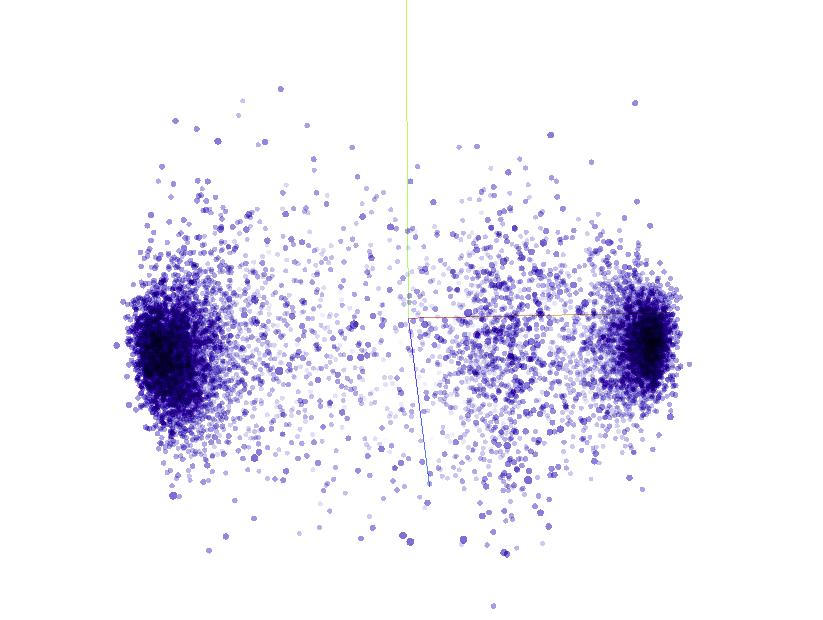

# Model 2: LSTM

In [45]:
# Creating an Embeddings layer (new embedding for each model to prevent data leakage)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_2')

# Create LSTM model
inputs=layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # returns vector for each word in the tweet (can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation='relu')(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name='model_2_LSTM')

(None, 15, 128)
(None, 64)


In [47]:
# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [48]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'LSTM')])

Saving TensorBoard log files to: model_logs/LSTM/20230608-123208
Epoch 1/5
215/215 [==============================] - 7s 22ms/step - loss: 0.5118 - accuracy: 0.7430 - val_loss: 0.4578 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 5s 21ms/step - loss: 0.3171 - accuracy: 0.8708 - val_loss: 0.5139 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 5s 22ms/step - loss: 0.2196 - accuracy: 0.9158 - val_loss: 0.5828 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 5s 22ms/step - loss: 0.1564 - accuracy: 0.9467 - val_loss: 0.6626 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 6s 26ms/step - loss: 0.1092 - accuracy: 0.9599 - val_loss: 0.8782 - val_accuracy: 0.7533


In [49]:
# Predictions
model_2_probs = model_2.predict(val_sentences)
model_2_probs.shape, model_2_probs[:10]

24/24 [==============================] - 1s 4ms/step


((762, 1),
 array([[0.01234728],
        [0.74578345],
        [0.99935526],
        [0.04763211],
        [0.00326248],
        [0.999409  ],
        [0.907483  ],
        [0.99967736],
        [0.9994093 ],
        [0.307993  ]], dtype=float32))

In [51]:
# Turn prediction probabilities into class predictions
model_2_preds = tf.squeeze(tf.round(model_2_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [52]:
# Calculating Model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 75.32808398950131,
 'precision': 0.7533943930774577,
 'recall': 0.7532808398950132,
 'f1': 0.7518108425860833}

In [53]:
# Compare model to baseline
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 79.27, New accuracy: 75.33, Difference: -3.94
Baseline precision: 0.81, New precision: 0.75, Difference: -0.06
Baseline recall: 0.79, New recall: 0.75, Difference: -0.04
Baseline f1: 0.79, New f1: 0.75, Difference: -0.03


# Model 3: GRU

In [54]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_3')

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x) 
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name='model_3_GRU')

In [55]:
# Compile GRU model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [56]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [57]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 'GRU')])

Saving TensorBoard log files to: model_logs/GRU/20230608-124504
Epoch 1/5
215/215 [==============================] - 7s 22ms/step - loss: 0.5278 - accuracy: 0.7249 - val_loss: 0.4556 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 5s 22ms/step - loss: 0.3196 - accuracy: 0.8697 - val_loss: 0.4925 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 5s 26ms/step - loss: 0.2187 - accuracy: 0.9183 - val_loss: 0.5574 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 5s 23ms/step - loss: 0.1574 - accuracy: 0.9461 - val_loss: 0.6110 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.1192 - accuracy: 0.9606 - val_loss: 0.6059 - val_accuracy: 0.7743


In [58]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


((762, 1),
 array([[0.4255507 ],
        [0.89336014],
        [0.9974325 ],
        [0.15910351],
        [0.01433519],
        [0.99161524],
        [0.7127798 ],
        [0.9974283 ],
        [0.9969337 ],
        [0.5119012 ]], dtype=float32))

In [59]:
# Convert prediction probabilities into prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [60]:
# Calculate model_3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.42782152230971,
 'precision': 0.7740023842417023,
 'recall': 0.7742782152230971,
 'f1': 0.7736009490663617}

In [61]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.27, New accuracy: 77.43, Difference: -1.84
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


# Model 4: Bi-directional RNN

In [62]:
# set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_4')

# Build a Bidirectional RNN in TF
# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [63]:
# compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [64]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [65]:
# Fit the model (takes longer due to bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                             train_labels,
                             epochs=5,
                             validation_data=(val_sentences, val_labels),
                             callbacks=[create_tensorboard_callback(SAVE_DIR, 'bidirectional_RNN')])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20230608-124642
Epoch 1/5
215/215 [==============================] - 11s 33ms/step - loss: 0.5096 - accuracy: 0.7468 - val_loss: 0.4586 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 7s 32ms/step - loss: 0.3154 - accuracy: 0.8726 - val_loss: 0.5134 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 6s 29ms/step - loss: 0.2164 - accuracy: 0.9171 - val_loss: 0.5607 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 9s 41ms/step - loss: 0.1538 - accuracy: 0.9450 - val_loss: 0.6491 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 6s 28ms/step - loss: 0.1075 - accuracy: 0.9632 - val_loss: 0.6791 - val_accuracy: 0.7743


In [66]:
# Make predictions 
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 2s 10ms/step


array([[0.01939893],
       [0.8025291 ],
       [0.9990241 ],
       [0.15323389],
       [0.00486654],
       [0.99670106],
       [0.8140482 ],
       [0.9995192 ],
       [0.9994815 ],
       [0.3704411 ]], dtype=float32)

In [67]:
# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [68]:
# Calculate bidirectional RNN model results
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 77.42782152230971,
 'precision': 0.7739247753664795,
 'recall': 0.7742782152230971,
 'f1': 0.7738379696150454}

In [69]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 79.27, New accuracy: 77.43, Difference: -1.84
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


# Model 5: Conv1D

In [70]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(['this is a test sentence'])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation='relu') # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [71]:
# See the outputs of each layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[ 0.04139357, -0.03848265,  0.00947097, ...,  0.01209709,
          -0.02570155,  0.01607963],
         [ 0.02725076,  0.05475005, -0.0191861 , ...,  0.04867174,
          -0.06460838,  0.07366479],
         [ 0.04175058,  0.04090529, -0.02106115, ..., -0.00923273,
          -0.02666038,  0.03121505],
         ...,
         [ 0.05558841,  0.03839752, -0.03699648, ...,  0.01291534,
          -0.00823131, -0.00593747],
         [ 0.05558841,  0.03839752, -0.03699648, ...,  0.01291534,
          -0.00823131, -0.00593747],
         [ 0.05558841,  0.03839752, -0.03699648, ...,  0.01291534,
          -0.00823131, -0.00593747]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.01525486, 0.05739066, 0.00532971, 0.12252933, 0.        ,
          0.        , 0.02732532, 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.00977272, 0.        , 0.07111079,
          0.10276052, 0.

In [72]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_5 (Dense)             (None, 1)              

In [73]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230608-124847
Epoch 1/5
215/215 [==============================] - 4s 15ms/step - loss: 0.5695 - accuracy: 0.7100 - val_loss: 0.4693 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3464 - accuracy: 0.8577 - val_loss: 0.4701 - val_accuracy: 0.7940
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2196 - accuracy: 0.9202 - val_loss: 0.5274 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1439 - accuracy: 0.9515 - val_loss: 0.6012 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1009 - accuracy: 0.9670 - val_loss: 0.6651 - val_accuracy: 0.7861


In [74]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.71985584],
       [0.7161334 ],
       [0.99991673],
       [0.1380302 ],
       [0.00443397],
       [0.99510753],
       [0.965341  ],
       [0.9980058 ],
       [0.9983696 ],
       [0.06828965]], dtype=float32)

In [75]:
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [76]:
# Calculate model_5 evaluation metrics 
model_5_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 78.60892388451444,
 'precision': 0.7907394181632303,
 'recall': 0.7860892388451444,
 'f1': 0.7831536805930754}

In [77]:
# Compare model_5 results to baseline 
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 79.27, New accuracy: 78.61, Difference: -0.66
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


# Model 6: Pretrained Sentence Encoder

Using transfer learning to leverage pretrained embeddings
* Universal Sentence Encoder
  * Replaces the text vectorizer and embedding layer we created as we now have trained weights

In [78]:
# Example of pretrained embedding with universal sentence encoder
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157025  0.02485911  0.02878051 -0.012715    0.03971541  0.08827761
  0.02680988  0.05589838 -0.01068731 -0.00597293  0.00639321 -0.01819516
  0.00030816  0.09105889  0.05874645 -0.03180629  0.01512474 -0.05162925
  0.00991366 -0.06865345 -0.04209306  0.0267898   0.03011009  0.00321065
 -0.00337968 -0.04787356  0.0226672  -0.00985927 -0.04063615 -0.01292093
 -0.04666382  0.05630299 -0.03949255  0.00517682  0.02495827 -0.07014439
  0.0287151   0.0494768  -0.00633978 -0.08960193  0.02807119 -0.00808364
 -0.01360601  0.05998649 -0.10361788 -0.05195372  0.00232958 -0.02332531
 -0.03758106  0.03327729], shape=(50,), dtype=float32)


In [79]:
embed_samples[0].shape

TensorShape([512])

In [80]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE") 

In [81]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [82]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230608-125154
Epoch 1/5
215/215 [==============================] - 5s 10ms/step - loss: 0.5047 - accuracy: 0.7932 - val_loss: 0.4494 - val_accuracy: 0.8018
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4154 - accuracy: 0.8155 - val_loss: 0.4378 - val_accuracy: 0.8123
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4008 - accuracy: 0.8212 - val_loss: 0.4332 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3936 - accuracy: 0.8264 - val_loss: 0.4286 - val_accuracy: 0.8123
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3874 - accuracy: 0.8286 - val_loss: 0.4299 - val_accuracy: 0.8123


In [83]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 13ms/step


array([[0.14956485],
       [0.7329681 ],
       [0.98611957],
       [0.1975678 ],
       [0.7570957 ],
       [0.69744974],
       [0.97531974],
       [0.9738351 ],
       [0.92446303],
       [0.08807148]], dtype=float32)

In [84]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [85]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.23359580052494,
 'precision': 0.8145687227271431,
 'recall': 0.8123359580052494,
 'f1': 0.81078947666798}

In [86]:
# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 79.27, New accuracy: 81.23, Difference: 1.97
Baseline precision: 0.81, New precision: 0.81, Difference: 0.00
Baseline recall: 0.79, New recall: 0.81, Difference: 0.02
Baseline f1: 0.79, New f1: 0.81, Difference: 0.02


# Model 7: Pretrained sentence encoder 10% training data

Transfer learning allows for good results using a fraction of the dataset
* Making 10% of the training data

In [88]:
# One kind of correct way (there are more) to make data subset
# (split the already split train_sentences/train_labels)
import numpy as np
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [89]:
# Check length of 10 percent datasets
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


In [90]:
# Check the number of targets in our subset of data 
# (this should be close to the distribution of labels in the original train_labels)
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
dtype: int64

In [91]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [92]:
# Fit the model to 10% of the training data
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20230608-125600
Epoch 1/5
22/22 [==============================] - 4s 40ms/step - loss: 0.6708 - accuracy: 0.6851 - val_loss: 0.6499 - val_accuracy: 0.6995
Epoch 2/5
22/22 [==============================] - 0s 22ms/step - loss: 0.5993 - accuracy: 0.8105 - val_loss: 0.5912 - val_accuracy: 0.7507
Epoch 3/5
22/22 [==============================] - 1s 28ms/step - loss: 0.5203 - accuracy: 0.8207 - val_loss: 0.5368 - val_accuracy: 0.7612
Epoch 4/5
22/22 [==============================] - 1s 30ms/step - loss: 0.4546 - accuracy: 0.8324 - val_loss: 0.5051 - val_accuracy: 0.7664
Epoch 5/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4111 - accuracy: 0.8367 - val_loss: 0.4884 - val_accuracy: 0.7795


In [93]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 0s 6ms/step


array([[0.2480746 ],
       [0.8015266 ],
       [0.89555603],
       [0.30175406],
       [0.5315275 ],
       [0.8330123 ],
       [0.8045781 ],
       [0.8475347 ],
       [0.8408635 ],
       [0.13186046]], dtype=float32)

In [94]:
# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [95]:
# Calculate model results
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 77.95275590551181,
 'precision': 0.7849754984084437,
 'recall': 0.7795275590551181,
 'f1': 0.7761172470890804}

In [96]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_7_results)

Baseline accuracy: 79.27, New accuracy: 77.95, Difference: -1.31
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.01


# Comparing all models

In [97]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.740157,0.791492,0.787402,0.784697
lstm,75.328084,0.753394,0.753281,0.751811
gru,77.427822,0.774002,0.774278,0.773601
bidirectional,77.427822,0.773925,0.774278,0.773838
conv1d,78.608924,0.790739,0.786089,0.783154
tf_hub_sentence_encoder,81.233596,0.814569,0.812336,0.810789
tf_hub_10_percent_data,77.952756,0.784975,0.779528,0.776117


In [98]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

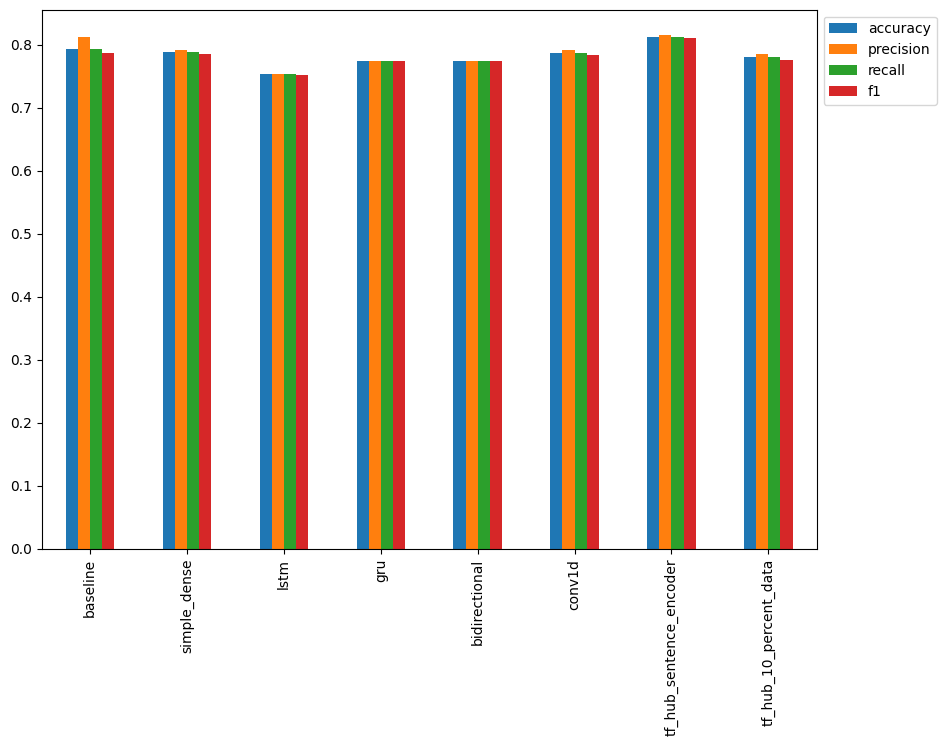

In [99]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

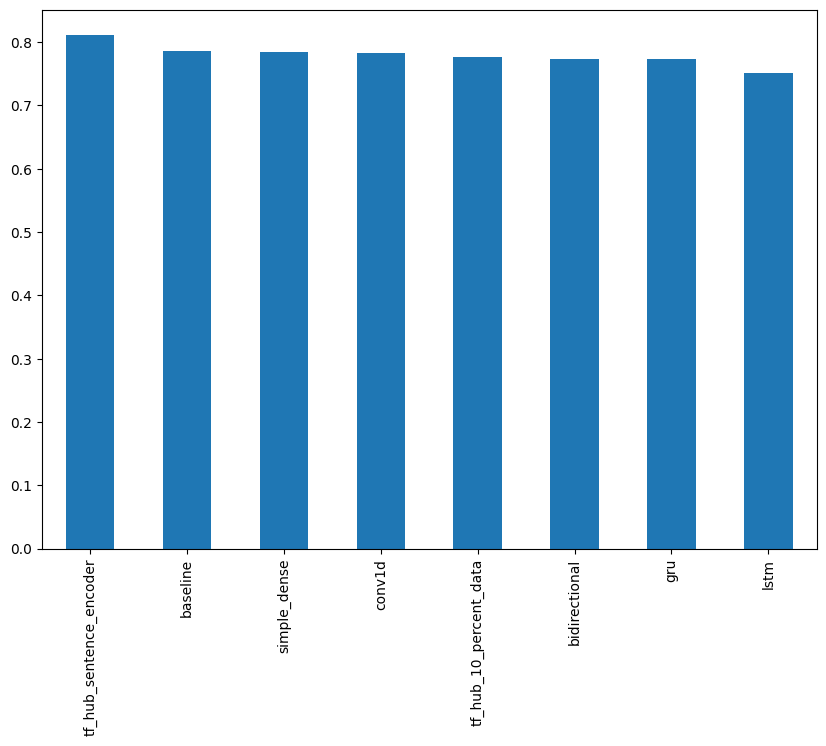

In [100]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

# Combining the models (Ensemble model)

In [102]:
# Get mean pred probs for 3 models
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1) # get the prediction probabilities from baseline model
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_probs, axis=1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3) # average and round the prediction probabilities to get prediction classes
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [103]:
# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 78.34645669291339,
 'precision': 0.7833332922843511,
 'recall': 0.7834645669291339,
 'f1': 0.783386733697999}

In [104]:
# Add our combined model's results to the results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results

In [105]:
# Convert the accuracy to the same scale as the rest of the results
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100

In [106]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.787402,0.791492,0.787402,0.784697
lstm,0.753281,0.753394,0.753281,0.751811
gru,0.774278,0.774002,0.774278,0.773601
bidirectional,0.774278,0.773925,0.774278,0.773838
conv1d,0.786089,0.790739,0.786089,0.783154
tf_hub_sentence_encoder,0.812336,0.814569,0.812336,0.810789
tf_hub_10_percent_data,0.779528,0.784975,0.779528,0.776117
ensemble_results,0.783465,0.783333,0.783465,0.783387


# Finding the most wrong examples

In [107]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.149565
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.732968
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.986120
3,@camilacabello97 Internally and externally scr...,1,0.0,0.197568
4,Radiation emergency #preparedness starts with ...,1,1.0,0.757096


In [108]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.899091
628,@noah_anyname That's where the concentration c...,0,1.0,0.852410
759,FedEx will no longer transport bioterror patho...,0,1.0,0.847769
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.840083
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.831527
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.815350
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.786851
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.783770
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.780855
549,Day 2. Liquidation of emergency at chemical ob...,0,1.0,0.759475


In [109]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.8990914821624756
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8524096608161926
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8477694392204285
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8400827050209045
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.8315272331237793
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob: 0.8153498768806458
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Pr

In [110]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.05561099946498871
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.053267646580934525
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob: 0.05275484919548035
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.05258318409323692
Text:
@BoyInAHorsemask its a panda trapped in a dogs body

----

Target: 1, Pred: 0, Prob: 0.05029232054948807
Text:
VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK

----

Target: 1, Pred: 0, Prob: 0.04717487841844559
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 0.039658237248659134
Text:
@SoonerMagic

From the most wrong examples, it's clear to see the ground truth label given to the text is wrong
* correcting these would make the model perform better

# Predictions

In [111]:
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 55ms/step
Pred: 0, Prob: 0.19386041164398193
Text:
Fuck around and drown ???? https://t.co/fr5z9WklMZ

----

1/1 [==============================] - 0s 50ms/step
Pred: 0, Prob: 0.1155112013220787
Text:
@ScarFacedCully Really cause you're spending more time panicking when you could be there

----

1/1 [==============================] - 0s 86ms/step
Pred: 0, Prob: 0.07577638328075409
Text:
@MikeParrActor if Ross is dead I shall never watch emmerdale again I'll be that heartbroken ??

----

1/1 [==============================] - 0s 95ms/step
Pred: 1, Prob: 0.956213116645813
Text:
Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/boZfh1M3wb

----

1/1 [==============================] - 0s 48ms/step
Pred: 0, Prob: 0.35835930705070496
Text:
We were fucking around on Google maps at work and I pulled up Boise and it blew their minds. Yeah Idaho isn't what you think at all.?

---

Predicting off random tweets not in the dataset:

In [112]:
# Source - https://twitter.com/BeirutCityGuide/status/1290696551376007168
beirut_tweet_1 = "Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon"

# Source - https://twitter.com/BeirutCityGuide/status/1290773498743476224
beirut_tweet_2 = "#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon"

In [114]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [115]:
# Predict on diaster Tweet 1
predict_on_sentence(model=model_6, 
                    sentence=beirut_tweet_1)

1/1 [==============================] - 0s 31ms/step
Pred: 1.0 (real disaster) Prob: 0.9620756506919861
Text:
Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon


In [116]:
# Predict on diaster Tweet 2
predict_on_sentence(model=model_6, 
                    sentence=beirut_tweet_2)

1/1 [==============================] - 0s 30ms/step
Pred: 1.0 (real disaster) Prob: 0.9636958241462708
Text:
#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon


# Speed/Score tradeoff

In [117]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  
  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(samples) # find prediction time per sample
  return total_time, time_per_pred

In [118]:
# Calculate TF Hub Sentence Encoder prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 11ms/step


(0.3549741870001526, 0.00046584538976397977)

In [119]:
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.022163539000757737, 2.908600918734611e-05)

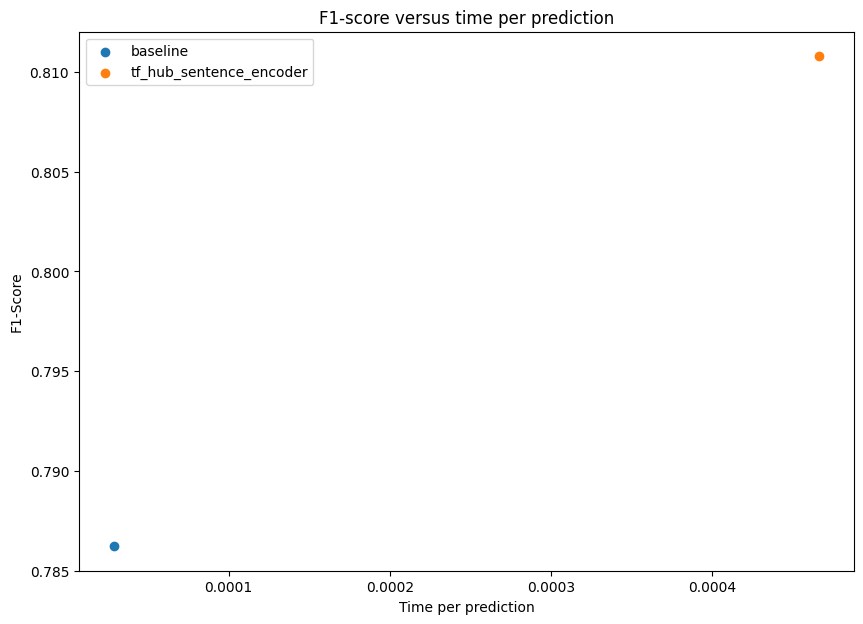

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");

Where large-scale deployment is concerned, a trade-off has to be made whether a faster but less accurate model is used